<a href="https://colab.research.google.com/github/bhausaheb-pachaptil/DSP_LAB/blob/main/EEG_DSP_with_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Path to your EEG CSV file
csv_path = r"/content/Data102.csv"   # change if needed

# 2) Load the dataset
df = pd.read_csv(csv_path)

# 3) Quick check
print(df.head())
print(df.shape)
print(df.columns)


   Unnamed: 0  trial number sensor position  sample num  sensor value  \
0           5            45             FP1           0        17.527   
1           6            45             FP1           1        17.527   
2           7            45             FP1           2        18.016   
3           8            45             FP1           3        18.992   
4           9            45             FP1           4        18.504   

  subject identifier matching condition  channel         name      time  
0                  a        S2 nomatch,        0  co2a0000369  0.000000  
1                  a        S2 nomatch,        0  co2a0000369  0.003906  
2                  a        S2 nomatch,        0  co2a0000369  0.007812  
3                  a        S2 nomatch,        0  co2a0000369  0.011719  
4                  a        S2 nomatch,        0  co2a0000369  0.015625  
(16384, 10)
Index(['Unnamed: 0', 'trial number', 'sensor position', 'sample num',
       'sensor value', 'subject ide

In [10]:
# Drop the unnecessary index column
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

print("Unique trial numbers:", df['trial number'].unique())
print("Unique sensors:", df['sensor position'].nunique())
print("Unique sensor names:", df['sensor position'].unique())
print("Unique subject IDs:", df['subject identifier'].unique())
print("Unique matching conditions (labels):", df['matching condition'].unique())

# Sampling info (from time column)
times = df['time'].unique()
dt = times[1] - times[0]
fs = 1.0 / dt
print(f"Number of samples per channel: {len(times)}")
print(f"Sampling interval: {dt} s")
print(f"Sampling frequency: {fs} Hz")


Unique trial numbers: [45]
Unique sensors: 64
Unique sensor names: ['FP1' 'FP2' 'F7' 'F8' 'AF1' 'AF2' 'FZ' 'F4' 'F3' 'FC6' 'FC5' 'FC2' 'FC1'
 'T8' 'T7' 'CZ' 'C3' 'C4' 'CP5' 'CP6' 'CP1' 'CP2' 'P3' 'P4' 'PZ' 'P8' 'P7'
 'PO2' 'PO1' 'O2' 'O1' 'X' 'AF7' 'AF8' 'F5' 'F6' 'FT7' 'FT8' 'FPZ' 'FC4'
 'FC3' 'C6' 'C5' 'F2' 'F1' 'TP8' 'TP7' 'AFZ' 'CP3' 'CP4' 'P5' 'P6' 'C1'
 'C2' 'PO7' 'PO8' 'FCZ' 'POZ' 'OZ' 'P2' 'P1' 'CPZ' 'nd' 'Y']
Unique subject IDs: ['a']
Unique matching conditions (labels): ['S2 nomatch,']
Number of samples per channel: 256
Sampling interval: 0.00390625 s
Sampling frequency: 256.0 Hz


In [11]:
# Pivot to get matrix: index = sample num, columns = sensor position
eeg_matrix = df.pivot_table(
    index='sample num',            # time samples
    columns='sensor position',     # channels
    values='sensor value'          # EEG amplitude
)

# Ensure rows are sorted by time
eeg_matrix = eeg_matrix.sort_index()

print("EEG matrix shape (time x channels):", eeg_matrix.shape)
print(eeg_matrix.head())


EEG matrix shape (time x channels): (256, 64)
sensor position     AF1     AF2     AF7     AF8     AFZ     C1     C2     C3  \
sample num                                                                     
0                13.611  13.519  17.710  13.367  12.899  0.631  1.190  2.614   
1                13.123  12.543  18.199  11.902  11.922  1.607  0.702  4.567   
2                12.634  11.566  19.175  10.437  11.922  2.584  0.702  6.032   
3                12.634  10.590  19.663   9.460  11.434  2.584  0.214  6.521   
4                12.634  10.101  18.687   8.972  10.946  2.584  0.702  7.009   

sensor position     C4      C5  ...    PO8    POZ     PZ      T7      T8  \
sample num                      ...                                        
0                4.028   5.992  ... -2.563 -7.019 -7.111   8.738  11.108   
1                5.005   7.945  ... -0.610 -4.089 -3.693  10.691  10.620   
2                4.517   9.898  ...  1.343 -0.183 -0.763  12.644   9.155   
3            

In [12]:
X_trial = eeg_matrix.values       # shape: (n_times, n_channels)


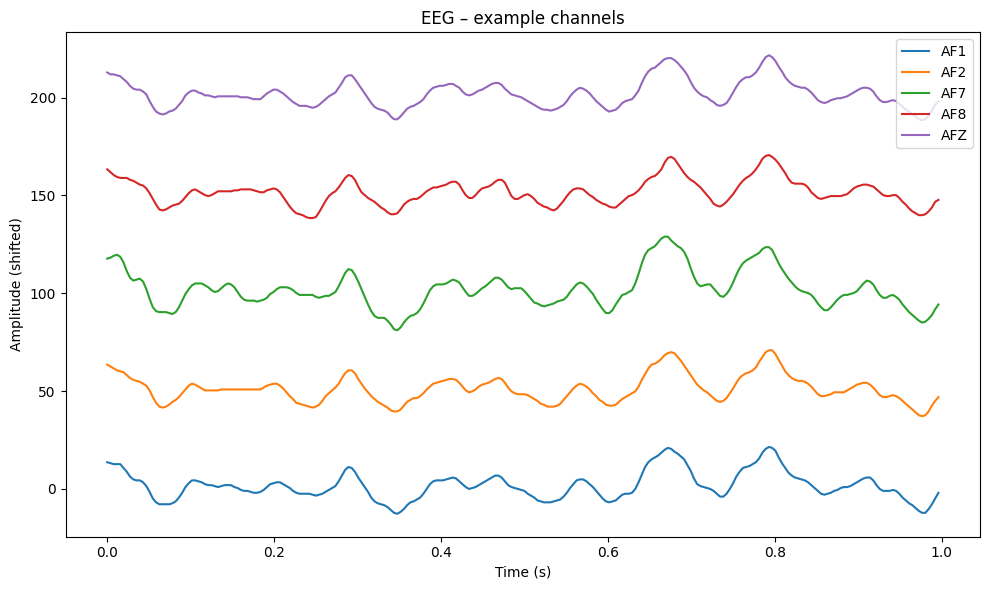

In [13]:
plt.figure(figsize=(10, 6))

# choose a few channels to plot
channels_to_plot = list(eeg_matrix.columns[:5])   # first 5 channels

time_axis = df['time'].unique()   # 256 time points

for i, ch in enumerate(channels_to_plot):
    plt.plot(time_axis, eeg_matrix[ch] + i*50, label=ch)
    # i*50 just shifts signals up so they don't overlap

plt.xlabel("Time (s)")
plt.ylabel("Amplitude (shifted)")
plt.title("EEG – example channels")
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
# Basic stats per channel
stats = eeg_matrix.agg(['mean', 'std', 'min', 'max']).T
print(stats.head())

# Flatten to a single feature vector for this trial
# (mean/std/min/max for each channel concatenated)
feature_vector = stats.values.flatten()   # shape: (n_channels * 4,)

print("Feature vector shape:", feature_vector.shape)


                     mean       std     min     max
sensor position                                    
AF1              1.680344  7.205164 -12.756  21.423
AF2              1.215012  6.990875 -12.848  20.844
AF7              1.965219  9.697072 -18.911  28.941
AF8              1.638418  6.681379 -11.536  20.691
AFZ              1.889555  6.945233 -11.515  21.688
Feature vector shape: (256,)


In [17]:
# Get label (matching condition) for this trial
label = df['matching condition'].iloc[0]
print("Label for this trial:", label)


Label for this trial: S2 nomatch,


In [23]:
import os
from tqdm import tqdm   # optional, for progress bar (pip install tqdm)

data_dir = r"/content/data"   # folder where all your CSVs are stored

X_list = []
y_list = []

for fname in tqdm(os.listdir(data_dir)):
    if not fname.endswith(".csv"):
        continue

    fpath = os.path.join(data_dir, fname)
    df_trial = pd.read_csv(fpath)

    # Drop index column if present
    if 'Unnamed: 0' in df_trial.columns:
        df_trial = df_trial.drop(columns=['Unnamed: 0'])

    # Pivot to time x channels
    eeg_mat = df_trial.pivot_table(
        index='sample num',
        columns='sensor position',
        values='sensor value'
    ).sort_index()

    # Basic stats per channel
    stats_trial = eeg_mat.agg(['mean', 'std', 'min', 'max']).T

    # Flatten to 1D
    feat_vec = stats_trial.values.flatten()

    # Label (matching condition)
    label_trial = df_trial['matching condition'].iloc[0]

    X_list.append(feat_vec)
    y_list.append(label_trial)

# Final ML dataset
X = np.vstack(X_list)          # shape: (n_trials, n_features)
y = np.array(y_list)           # shape: (n_trials,)

print("Final X shape:", X.shape)
print("Final y shape:", y.shape)
print("Unique labels:", np.unique(y))


100%|██████████| 2/2 [00:00<00:00, 15.31it/s]

Final X shape: (2, 256)
Final y shape: (2,)
Unique labels: ['S2 match' 'S2 nomatch,']


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train–test split
# Removed 'stratify=y' because the dataset is too small for stratified splitting (each class has only 1 member)
# Ideally, you would gather more data for each class.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # removed stratify=y
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Random Forest
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_scaled, y_train)

# Evaluation
y_pred = clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("Test accuracy:", acc)
print("\nReport:\n", classification_report(y_test, y_pred))


Test accuracy: 0.0

Report:
               precision    recall  f1-score   support

    S2 match       0.00      0.00      0.00       1.0
 S2 nomatch,       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_